# 6.2 (random correlation)

In [ ]:
using LinearAlgebra
using Plots
using Colors
using Statistics
using Polynomials
gr()

Function that generates random numbers until it gets a 4, then keeps the number that is generated after that in an array, then returns that array.

In [ ]:
function conditionalRandom(N)
    i = 1
    randomNumbers = Int[]
    while i < N
        num = rand(0:9)
        if num == 4
            i += 1
            push!(randomNumbers, rand(0:9))
        end
    end
    return randomNumbers
end

plotting the histogram of the random numbers.

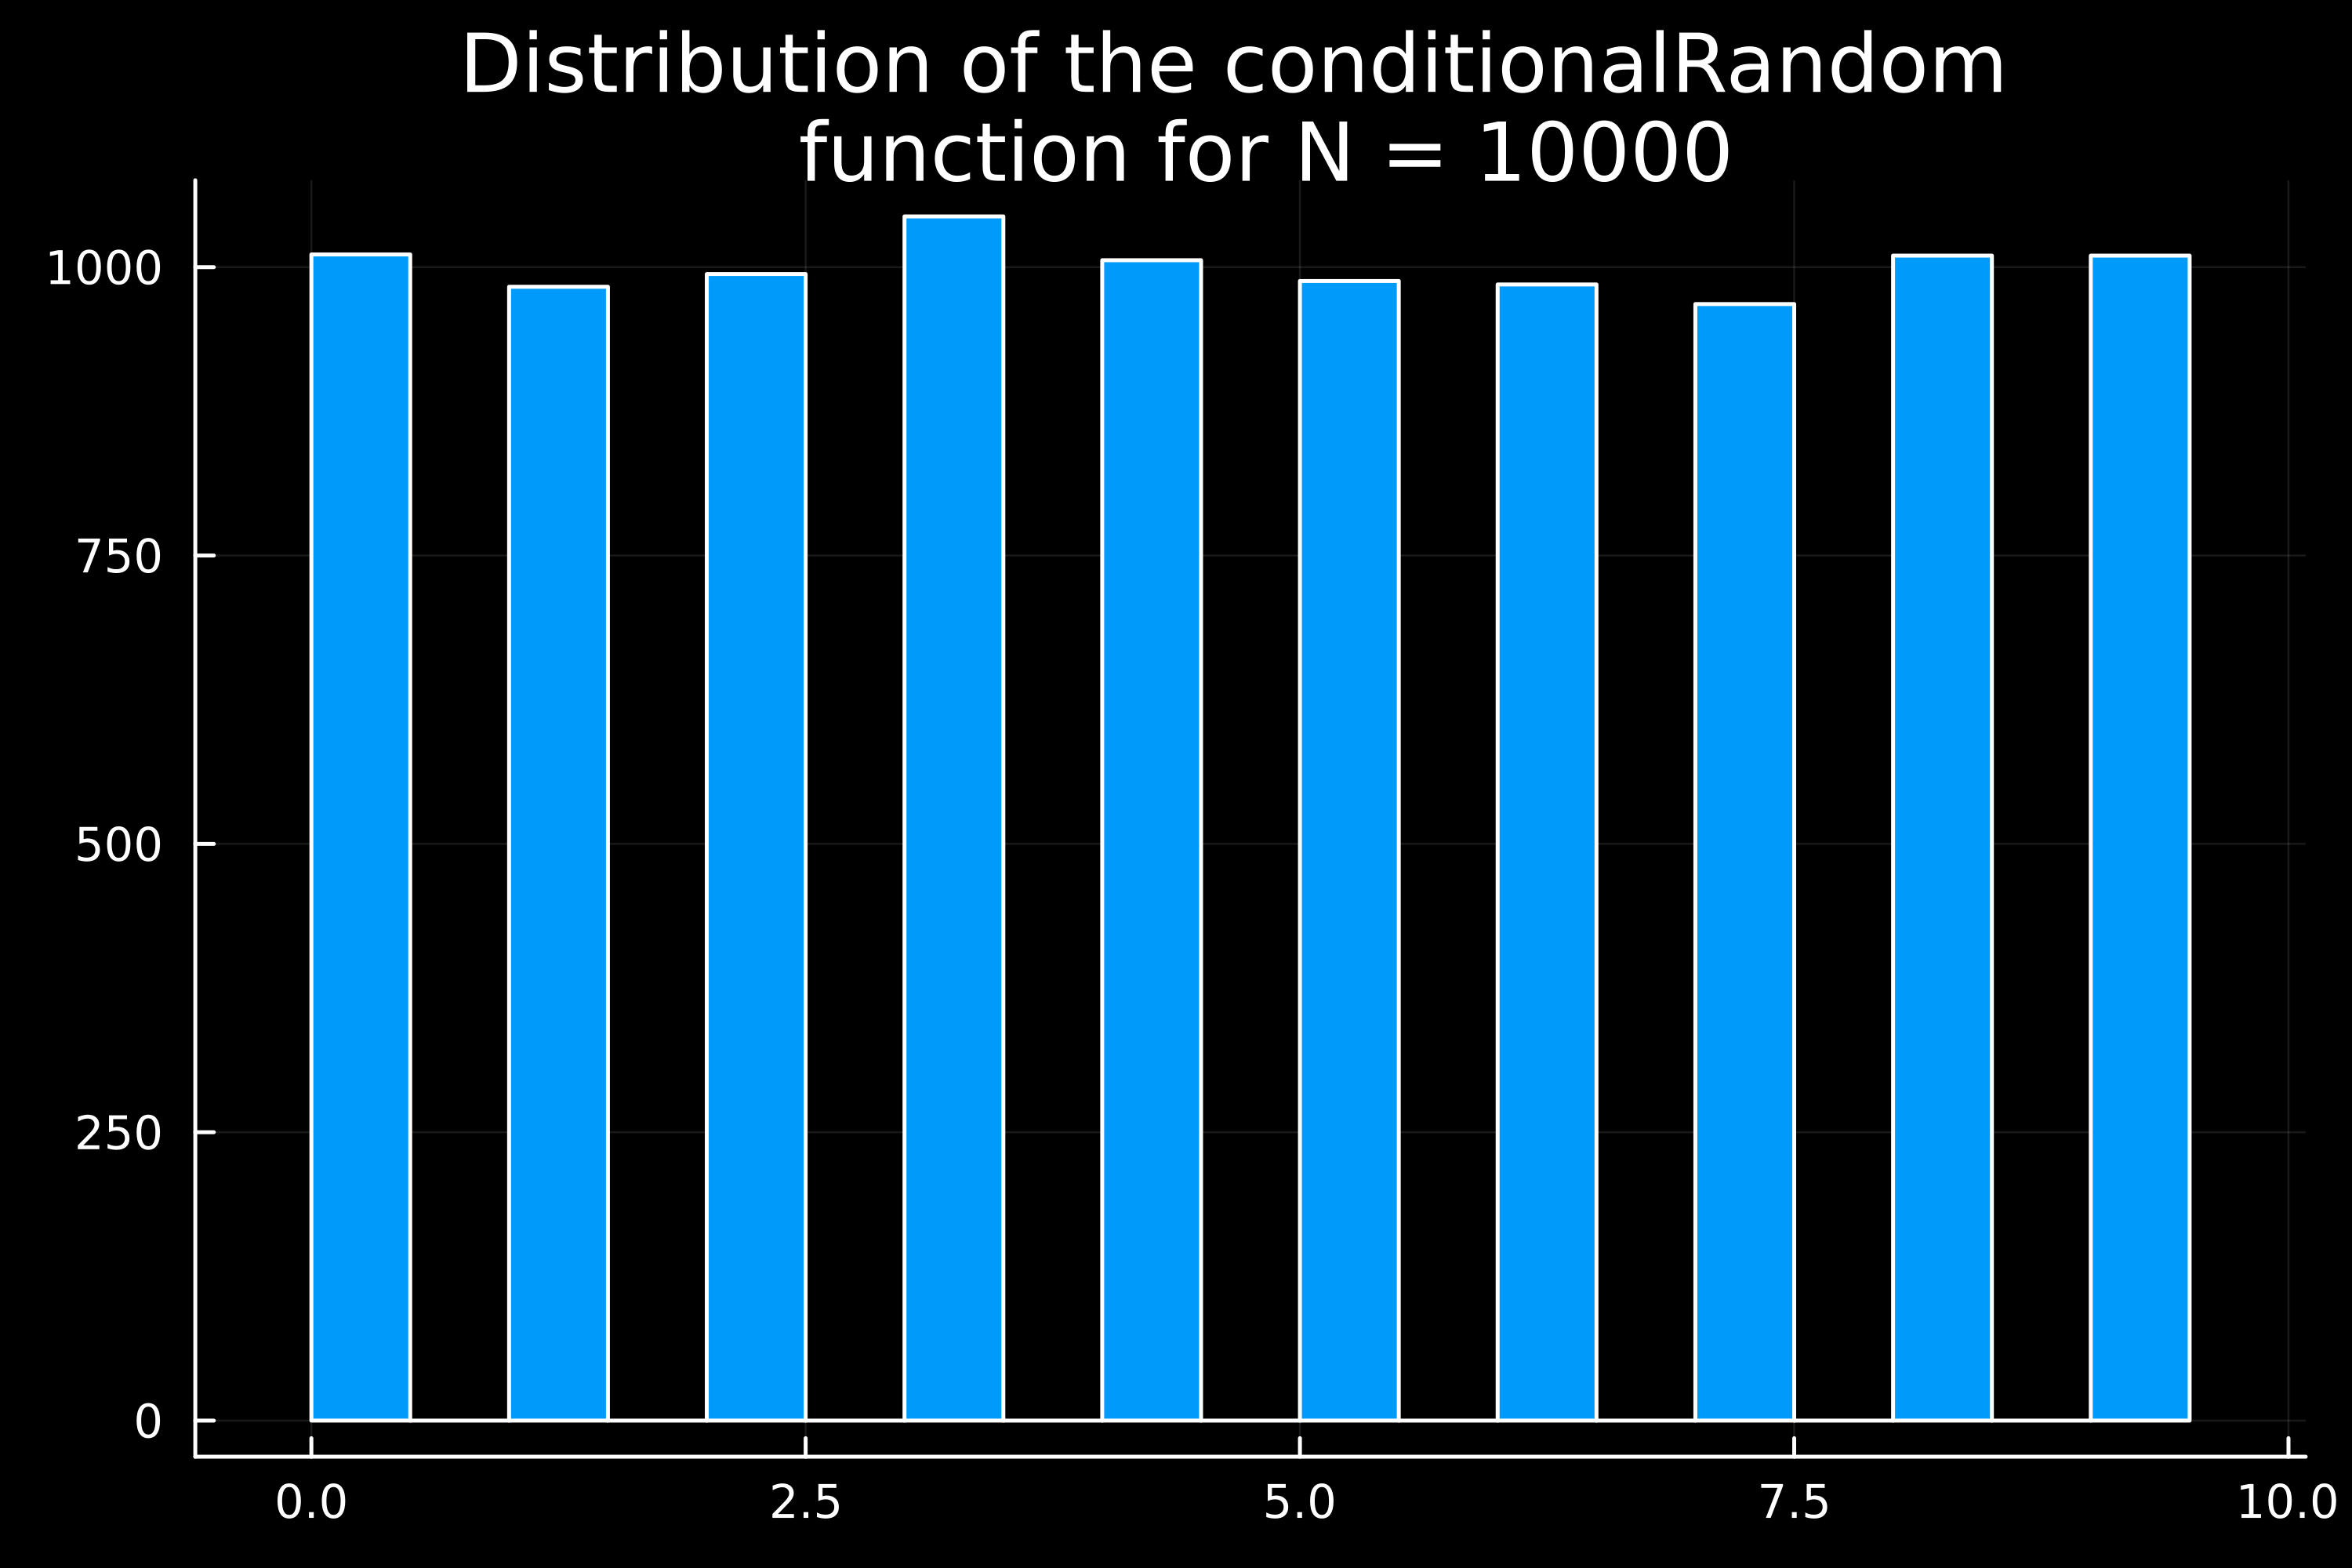

In [28]:
N = 10000
randomNumber = conditionalRandom(N)
histogram(randomNumber, title = "Distribution of the conditionalRandom \n function for N = $N", background = :black, legend = false, dpi = 500)

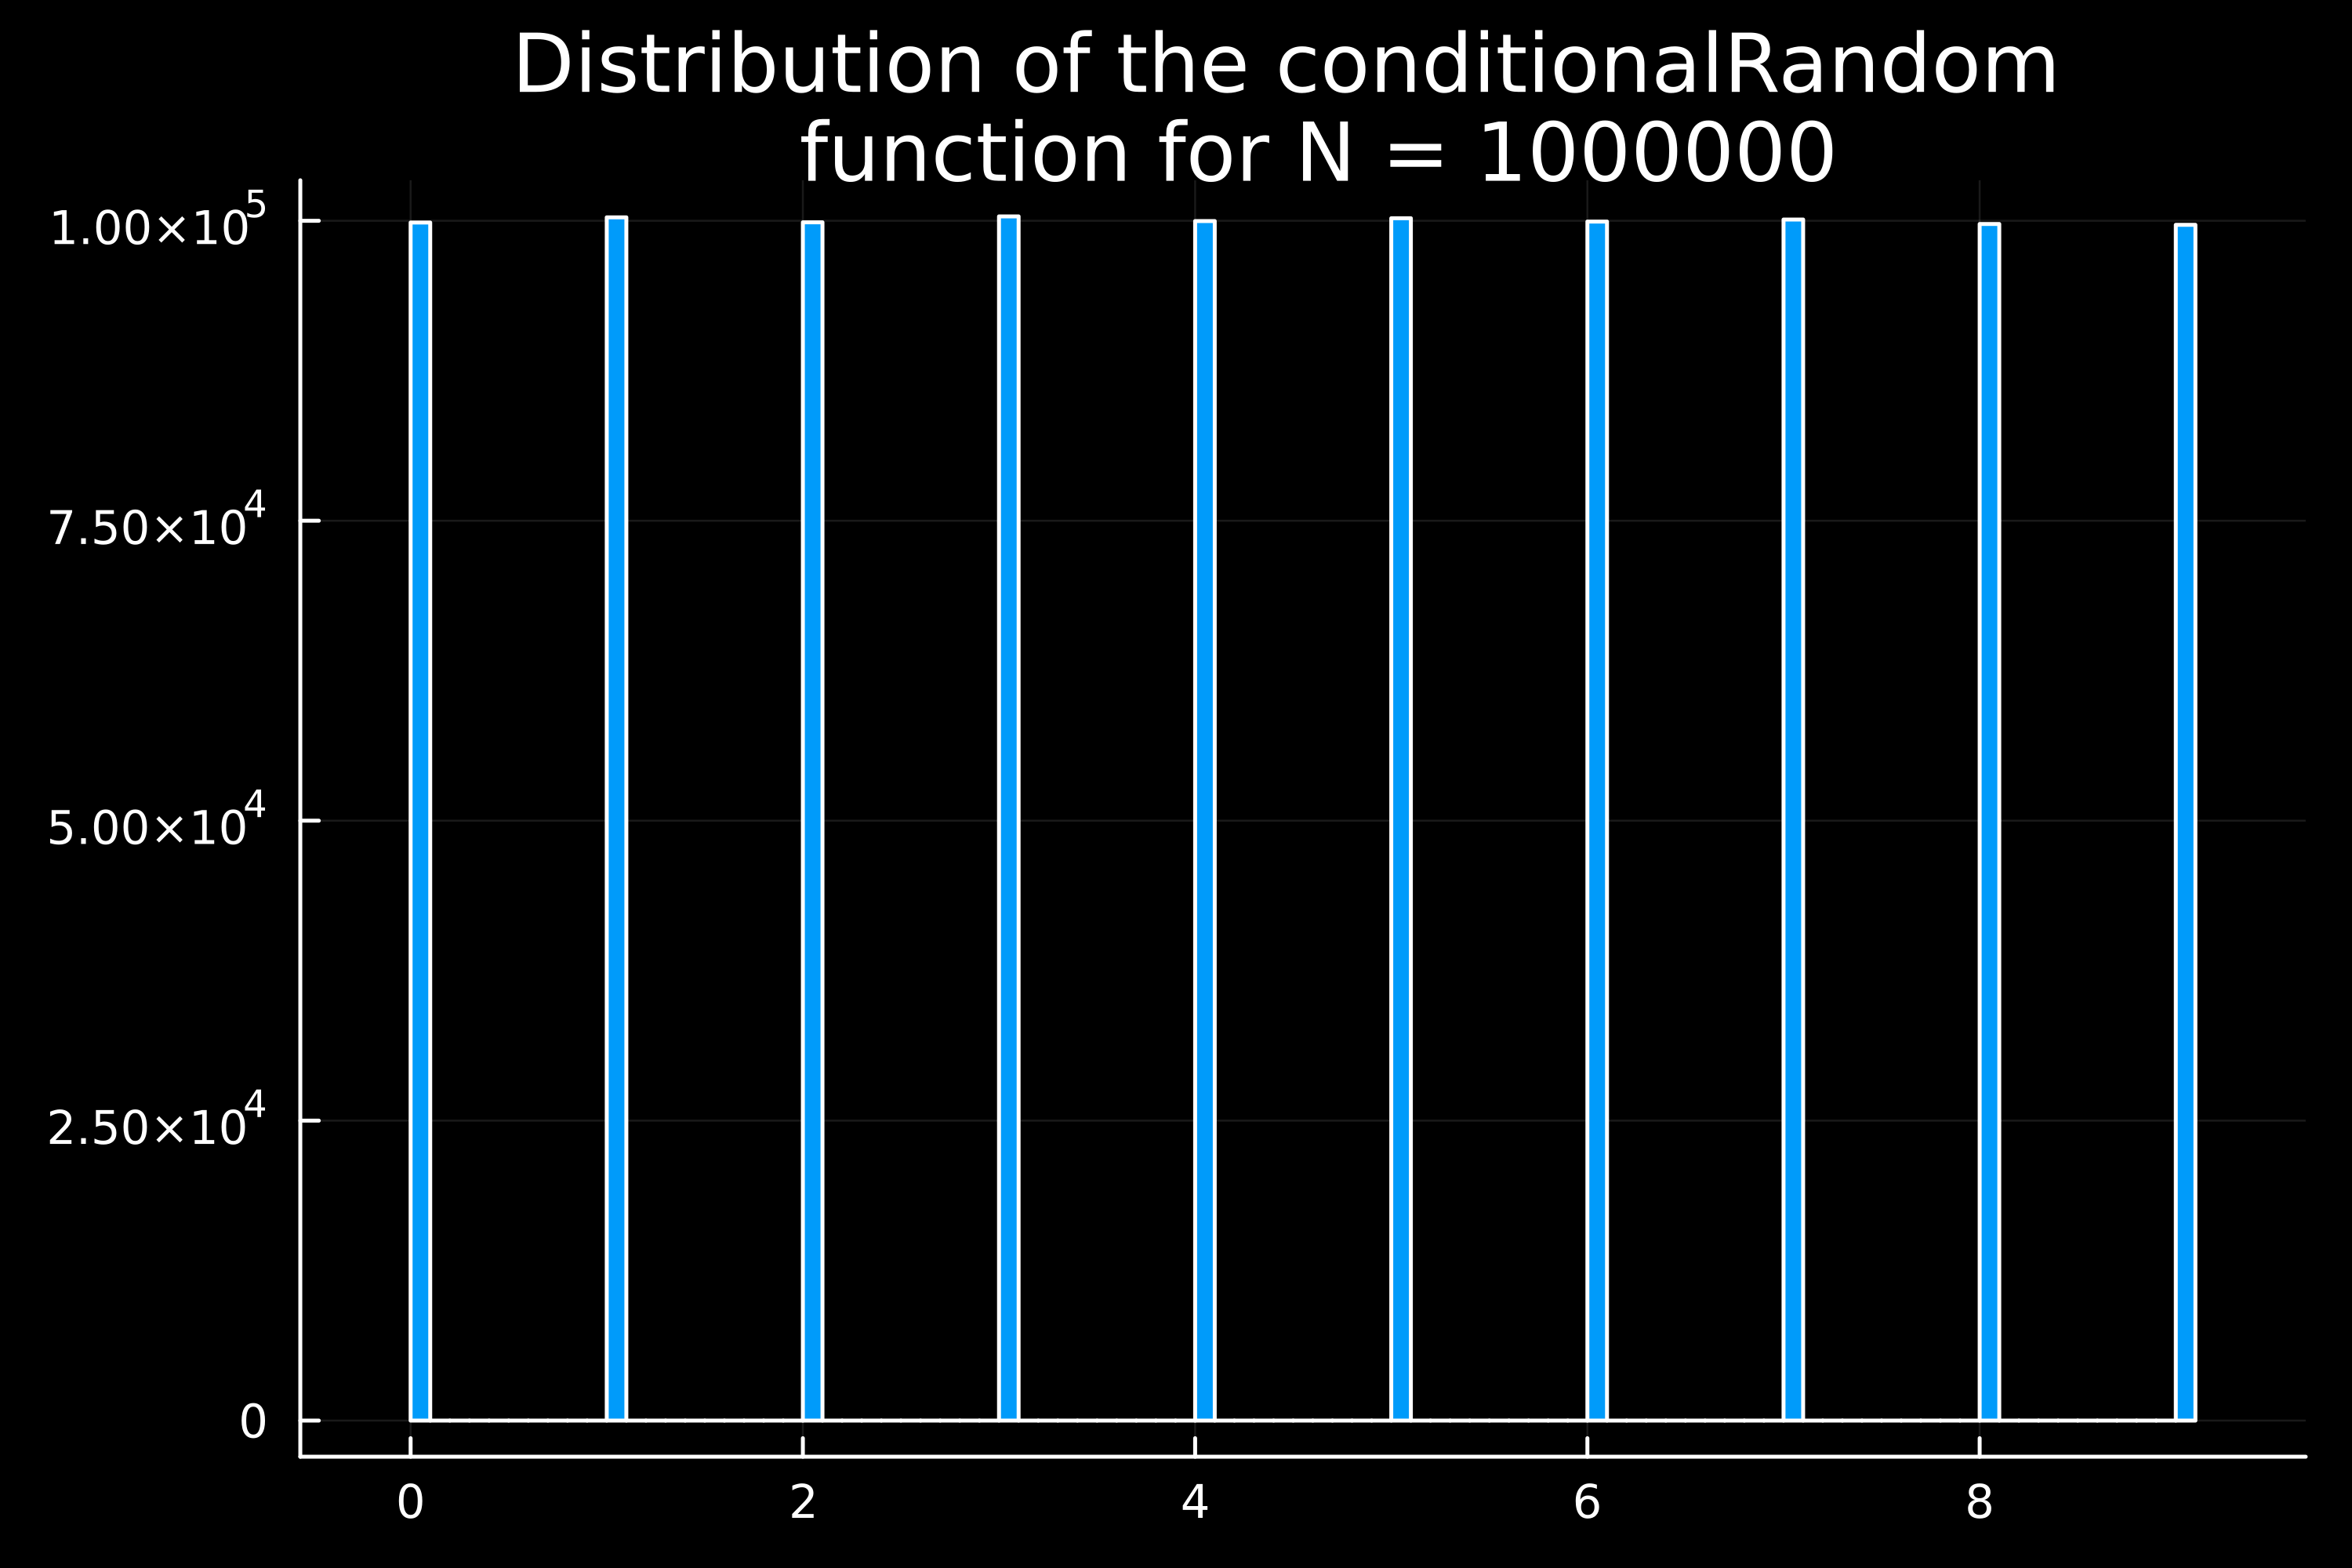

In [30]:
N = 1000000
randomNumber = conditionalRandom(N)
histogram(randomNumber, title = "Distribution of the conditionalRandom \n function for N = $N", background = :black, legend = false, dpi = 500)

There doesn't seem to be much of a correlation between the numbers.

function that counts the number of times a number has appeared.

In [31]:
function distributionCount(array)
    numberCount = zeros(10)
    for i in 1:length(array)
        numberCount[array[i] + 1] += 1 
    end
    return numberCount
end

distributionCount (generic function with 1 method)

function that calculates the deviation of the frequency of appearance from the theoretical perfect value. (this function averages over all 10 numbers)

In [32]:
function deviation(numberCount, N)
    sum = 0
    for i in 1:10
        sum += (numberCount[i] - N / 10) ^ 2
    end
    dev = sqrt(sum / 10)
    return dev
end

deviation (generic function with 1 method)

Calculating the deviation for different values of N.

In [33]:
dataCount = 100 #number of unique datapoints
averageCount = 100 #number of runs the data is averaged over
devs = Float64[] #includes sigma/N values
Ns = Float64[] #includes N values
sqrtN = Float64[] #include 1/sqrt(N) values
for i in 1:dataCount
    N = 100 + i * 500
    results = Float64[]
    for j in 1:averageCount
        push!(results, deviation(distributionCount(conditionalRandom(N)), N) / N)
    end
    dev = mean(results)
    push!(Ns, N)
    push!(sqrtN, 1 / sqrt(N))
    push!(devs, dev)
end

Plotting a linear plot of $\frac{\sigma}{N}$ based on $\frac{1}{\sqrt{N}}$ and fitting a slope.

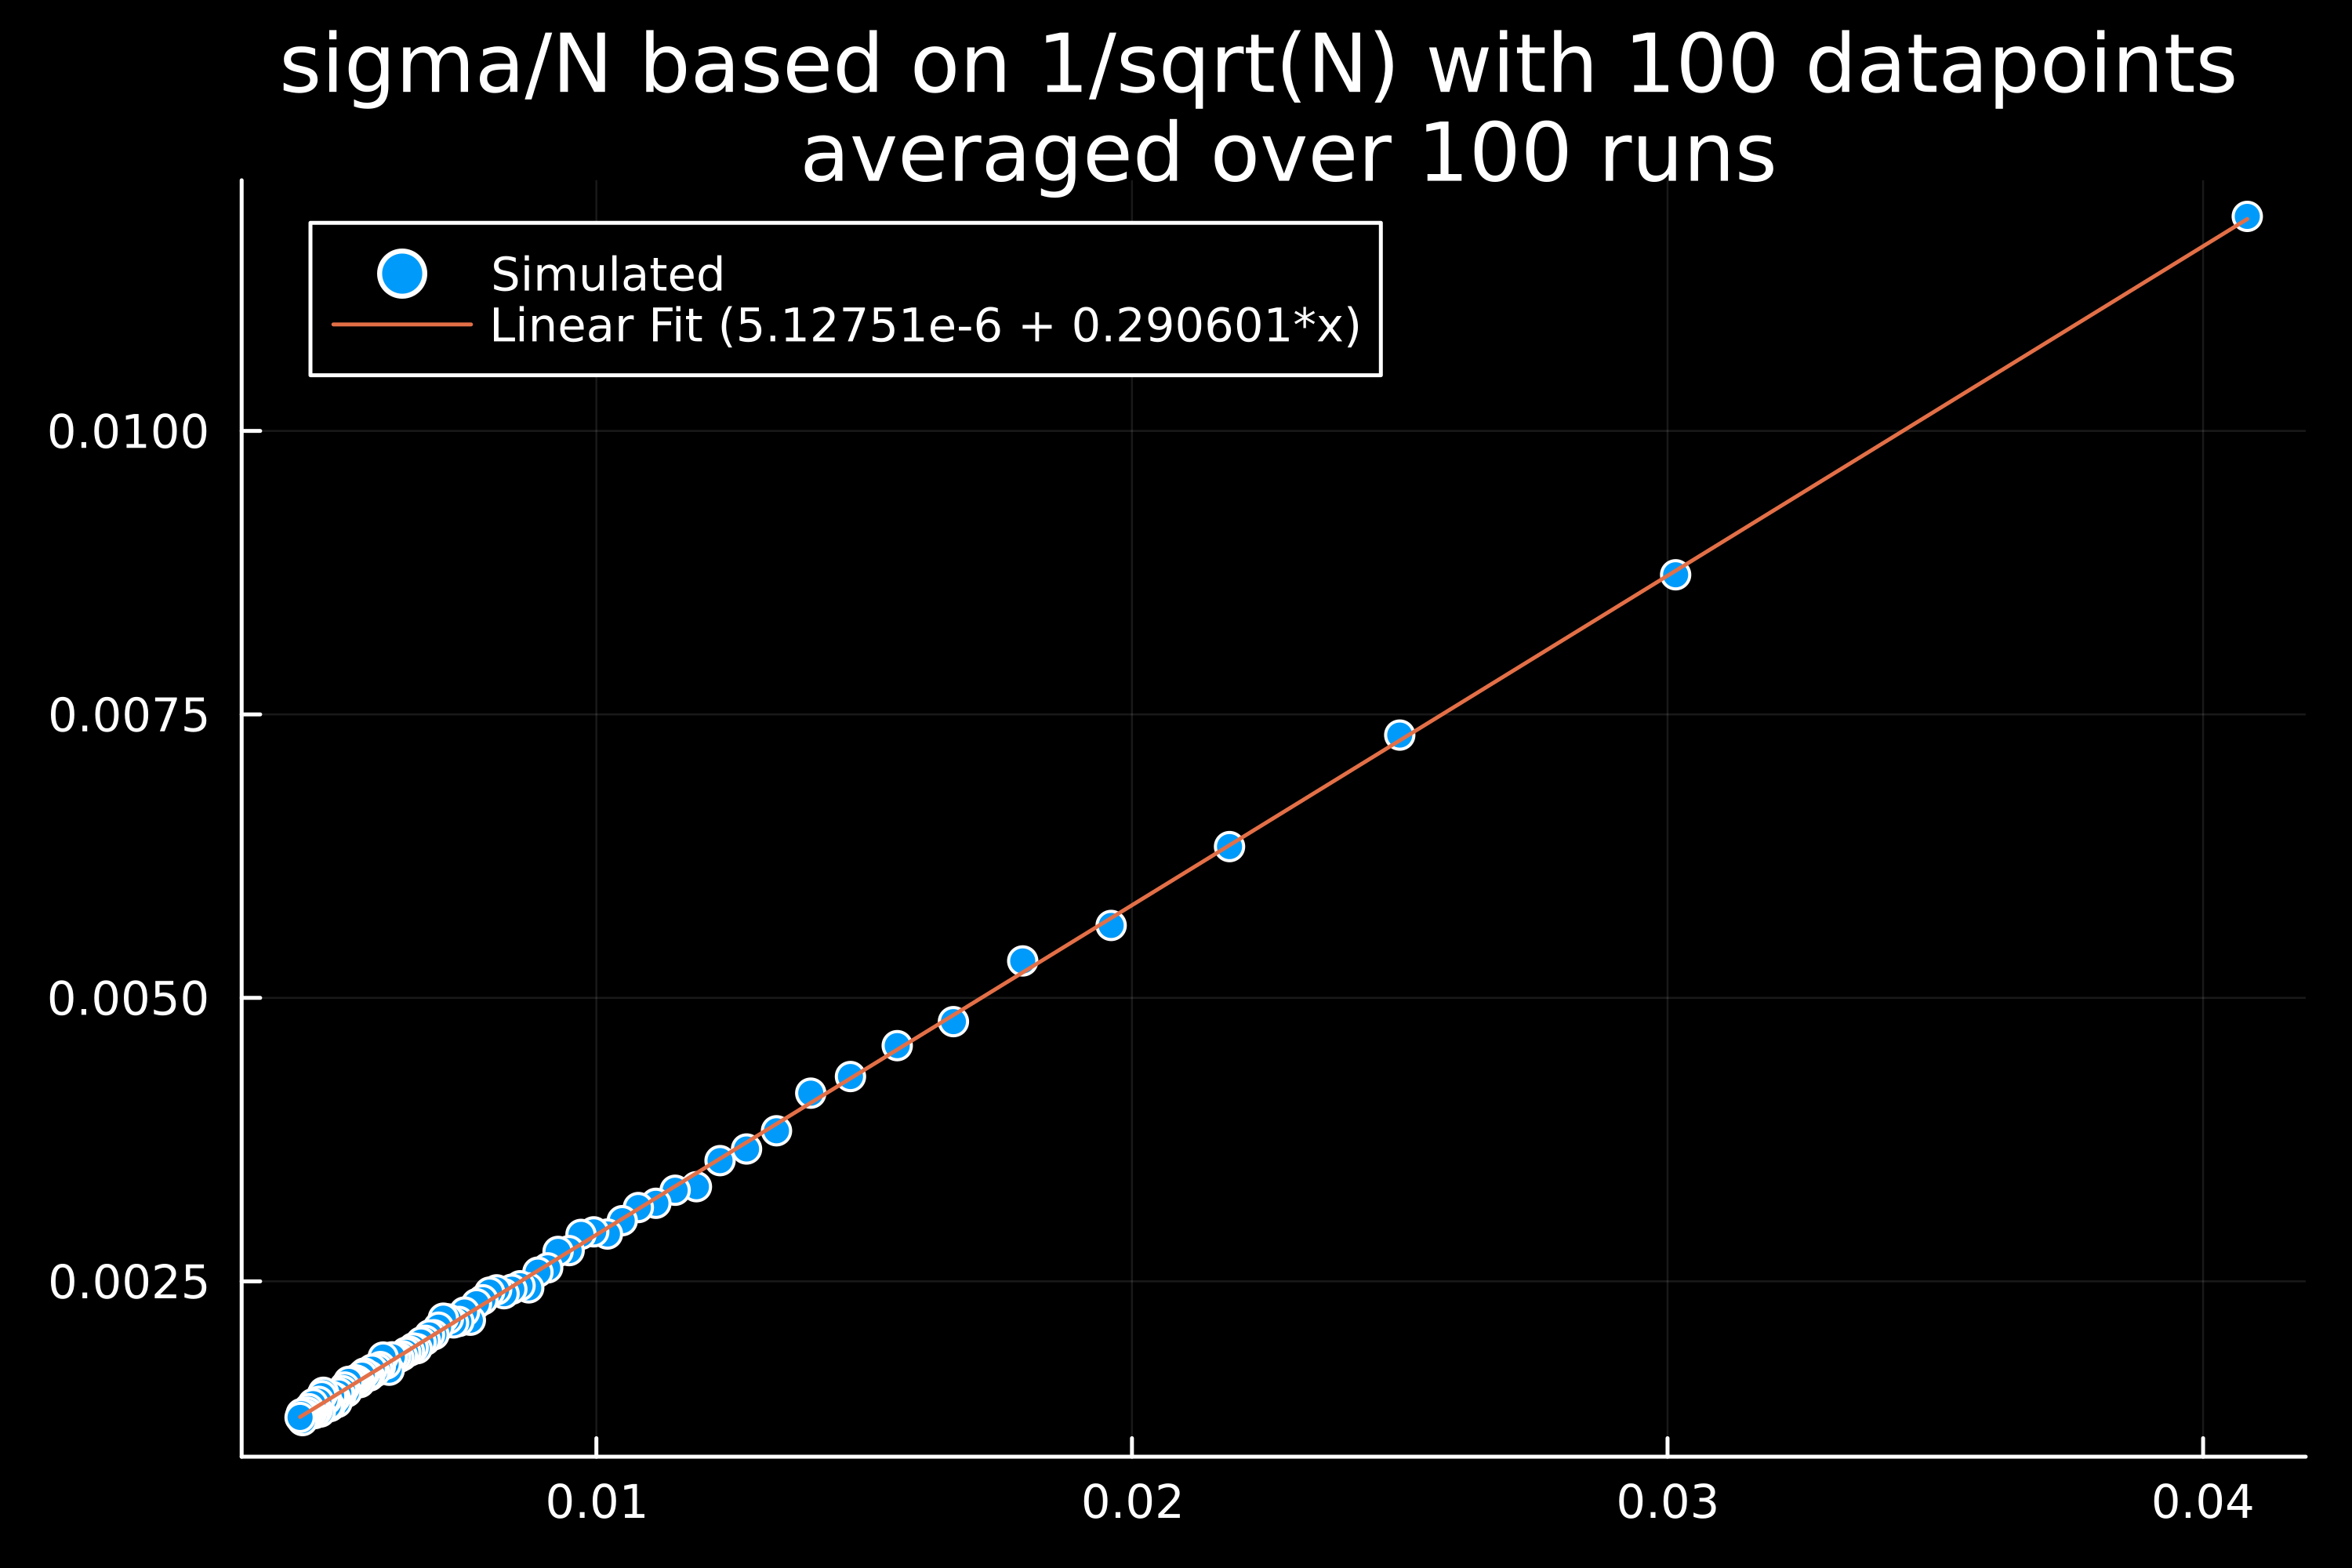

In [34]:
f = fit(sqrtN, devs, 1)
scatter(sqrtN, devs,
    background = :black,
    markerstrokealpha = 0,
    title = "sigma/N based on 1/sqrt(N) with $dataCount datapoints \n averaged over $averageCount runs",
    label = "Simulated",
    dpi = 500
)

plot!(f, extrema(sqrtN)..., label="Linear Fit ($f)")

Plotting the values of $\frac{\sigma}{N}$ and $\frac{C}{\sqrt{N}}$ based on $N$. (Where C is the slope of the fitted line)

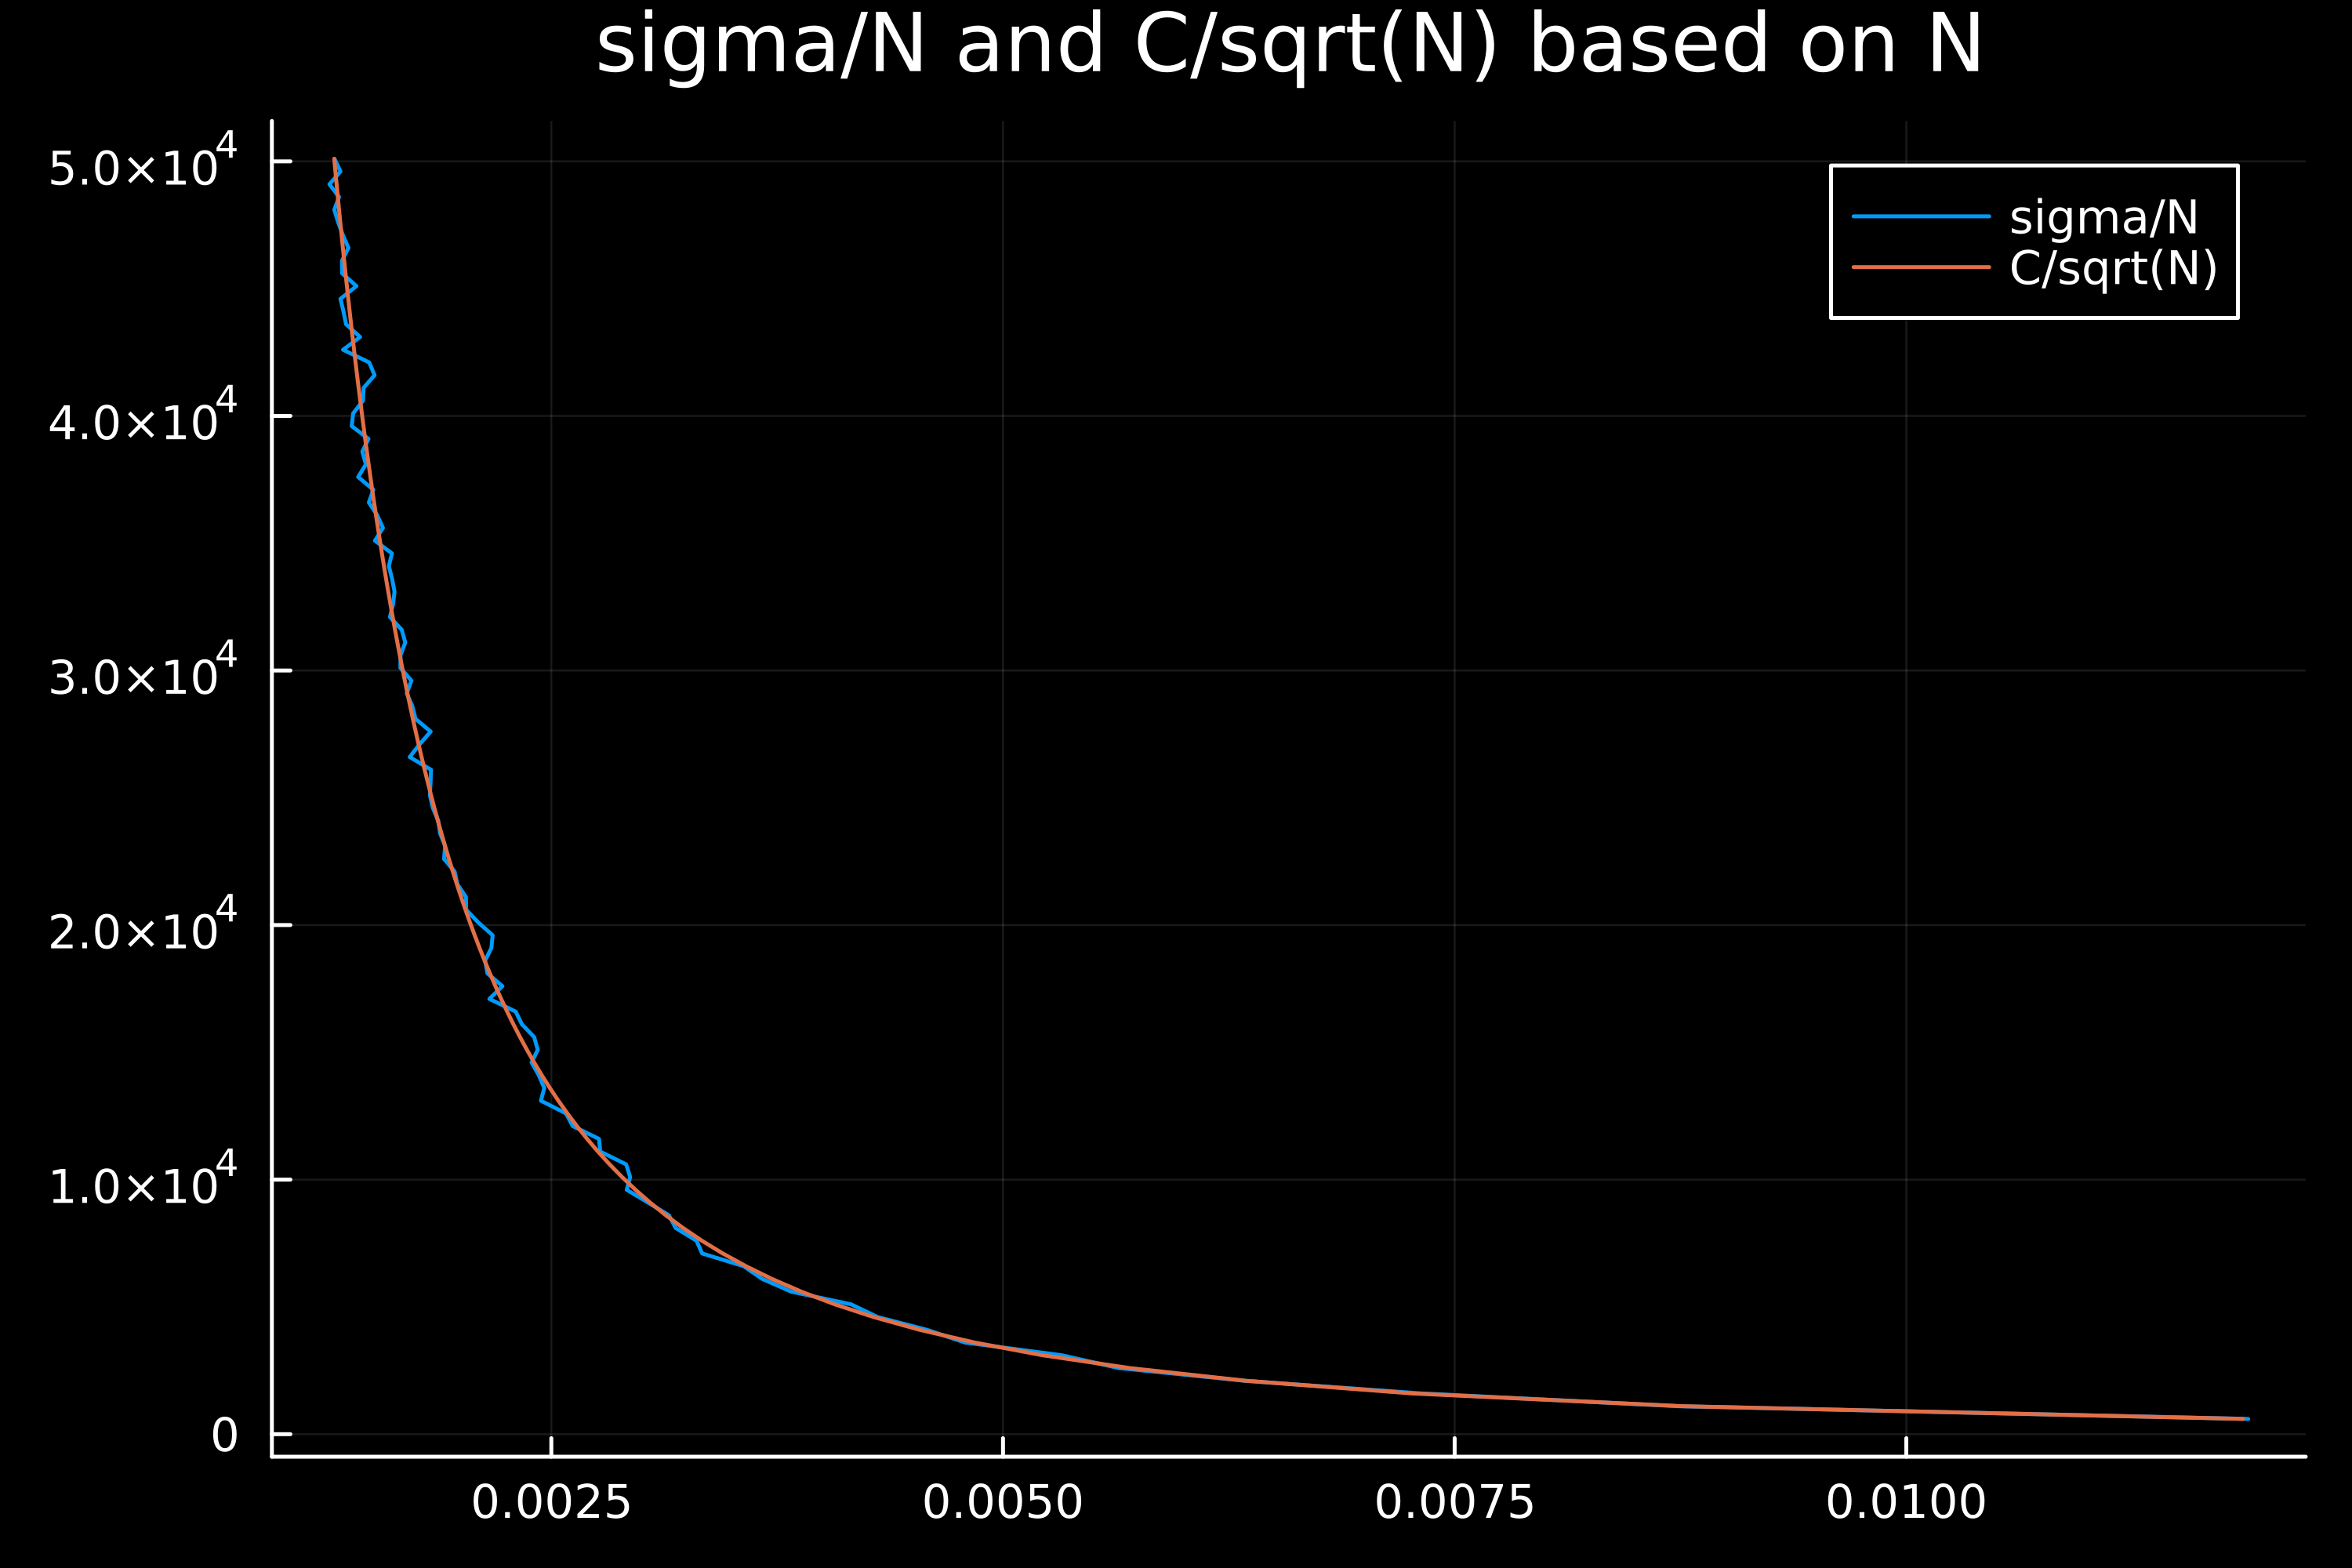

In [35]:
C = f[1]
newSqrtN = []
for i in 1:length(sqrtN)
    push!(newSqrtN, C * sqrtN[i])
end
plot(devs, Ns,
    background = :black,
    markerstrokealpha = 0,
    title = "sigma/N and C/sqrt(N) based on N",
    label = "sigma/N",
    dpi = 500
)
plot!(newSqrtN, Ns, label = "C/sqrt(N)")